In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [47]:
ls

drama_genre.csv  sample_data/


In [67]:
genre_df = pd.read_csv("drama_genre.csv")
genre_df.tail(100)

,sum_age_mainactors,avg_slap_face,genre
0,46.000000,0.175000,1
1,44.000000,0.175000,1
2,42.000000,0.162500,1
3,41.000000,0.187500,1
4,45.000000,0.175000,1
...,...,...,...
95,57.425381,0.567538,0
96,57.455871,0.570587,0
97,62.471506,0.584651,0
98,46.478691,0.422869,0


In [68]:
# 데이터 정규화
genre_df = (genre_df-genre_df.min())/(genre_df.max()-genre_df.min())
genre_df.head(100)

,sum_age_mainactors,avg_slap_face,genre
0,0.249195,0.091389,1.0
1,0.186896,0.091389,1.0
2,0.124598,0.068542,1.0
3,0.093448,0.114237,1.0
4,0.218046,0.091389,1.0
...,...,...,...
95,0.605089,0.808866,0.0
96,0.606039,0.814439,0.0
97,0.762273,0.840144,0.0
98,0.264106,0.544442,0.0


In [0]:
# 독립변수, 종속변수 정하기
x_1 = genre_df.sum_age_mainactors
x_2 = genre_df.avg_slap_face
y = genre_df.genre

In [0]:
# Gradient Descent를 활용한 Logistic Regression 모델 구현
w_0, w_1, w_2 = np.random.random(3)

loss_history = []
w0_history = []
w1_history = []
w2_history = []

lr = 1e-1
epoch = 400

for i in range(epoch):
    z = w_0 + w_1*x_1 + w_2*x_2
    prob = 1/(1+np.exp(-z))

    dw0 = np.mean(prob-y)
    dw1 = np.mean((prob-y)*x_1)
    dw2 = np.mean((prob-y)*x_2)

    w_0 = w_0 - dw0*lr
    w_1 = w_1 - dw1*lr
    w_2 = w_2 - dw2*lr

    crossentropy = -np.mean(y*np.log(prob) + (1-y)*(np.log(1-prob)))

    loss_history.append(crossentropy)
    w0_history.append(w_0)
    w1_history.append(w_1)
    w2_history.append(w_2)

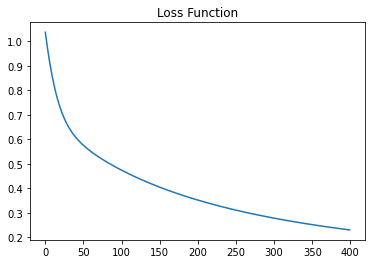

In [94]:
# 손실함수 그래프 확인
plt.title("Loss Function")
plt.plot(loss_history)
plt.show()

In [0]:
new_w0 = w0_history[-1]

In [0]:
new_w1 = w1_history[-1]
new_w2 = w2_history[-1]

In [0]:
x_0 = [-new_w0/new_w1, 0]
y_0 = [0, -new_w0/new_w2]

In [98]:
x_0

[1.5331947708217222, 0]

In [99]:
y_0

[0, 0.5401455970160683]

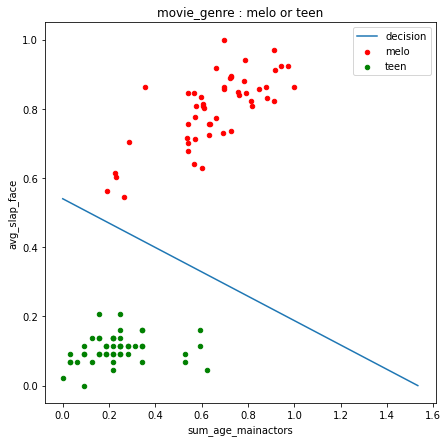

In [100]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)
ax.plot(x_0,y_0) # Decision boundary 그리기

# 0: 정상
genre_df[genre_df.genre==0].plot('sum_age_mainactors','avg_slap_face',ax=ax,legend=True,
                                   kind='scatter',color='red')
# 1: 암환자
genre_df[genre_df.genre==1].plot('sum_age_mainactors','avg_slap_face',ax=ax,legend=True,
                                   kind='scatter',color='green')
plt.legend(["decision",'melo','teen'])
plt.title("movie_genre : melo or teen")
plt.show()